### **Model Training**

**1.1 Import Data and Required Packages**

**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

/tmp/ipykernel_34727/3256063811.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


**Import the CSV Data as Pandas DataFrame**

In [2]:
path = "/home/jash/Workspace/MLOps_Project/data/StudentsPerformance.csv"

df = pd.read_csv(path)

**Read Random 5 Record**

In [3]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
93,male,group C,associate's degree,free/reduced,completed,43,45,50
388,female,group D,high school,standard,none,62,64,64
379,male,group A,bachelor's degree,standard,none,66,64,62
846,male,group C,master's degree,standard,completed,91,85,85
861,female,group E,master's degree,free/reduced,none,81,86,87


**Preparing X and Y variables**

In [5]:
x = df.drop(columns = ['math score'], axis = 1)
x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [7]:
print("Categories in 'gender' variables: ", end = " ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variables: ", end = " ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variables: ", end = " ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variables: ", end = " ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variables: ", end = " ")
print(df['test preparation course'].unique())

Categories in 'gender' variables:  ['female' 'male']
Categories in 'race/ethnicity' variables:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variables:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variables:  ['standard' 'free/reduced']
Categories in 'test preparation course' variables:  ['none' 'completed']


In [8]:
y = df['math score']

In [9]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [11]:
num_feature = x.select_dtypes(exclude="object").columns
cat_feature = x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_feature),
        ("StandarScaler", numeric_transformer, num_feature)
    ]
)

In [13]:
x = preprocessor.fit_transform(x)

In [14]:
x.shape

(1000, 19)

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=64)
x_train.shape, x_test.shape

((750, 19), (250, 19))

**Create an evalution function to give all metrics after model training**

In [18]:
def evaluate_model(true, pred):
    mas = mean_absolute_error(true, pred)
    mse = mean_squared_error(true, pred)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, pred)
    
    return mas, rmse, r2_square

In [25]:
models = {
    "Liner Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)
    
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model performance for trainset")
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    
    print("------------------------------------------------------------")
    
    print("Model performance for testset")
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print("\n")
    print("|"*64)
    print("\n")

Liner Regression
Model performance for trainset
- Root Mean Squared Error: 5.3448
- Mean Absolute Error: 4.2730
- R2 Score: 0.8758
------------------------------------------------------------
Model performance for testset
- Root Mean Squared Error: 5.2969
- Mean Absolute Error: 4.1949
- R2 Score: 0.8773


||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


Lasso
Model performance for trainset
- Root Mean Squared Error: 6.5596
- Mean Absolute Error: 5.2013
- R2 Score: 0.8129
------------------------------------------------------------
Model performance for testset
- Root Mean Squared Error: 6.5078
- Mean Absolute Error: 5.0556
- R2 Score: 0.8148


||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


Ridge
Model performance for trainset
- Root Mean Squared Error: 5.3451
- Mean Absolute Error: 4.2718
- R2 Score: 0.8758
------------------------------------------------------------
Model performance for testset
- Root Mean Squared Error: 5.2932
- Mean Absolute Er

**Result**

In [26]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2 Score']).sort_values(by = ['R2 Score'], ascending = False)


,Model Name,R2 Score
2,Ridge,0.877485
0,Liner Regression,0.877315
7,CatBoosting Regressor,0.841141
5,Random Forest Regressor,0.830688
8,AdaBoost Regressor,0.820952
1,Lasso,0.814808
6,XGBRegressor,0.804919
3,K-Neighbors Regressor,0.788789
4,Decision Tree,0.705731


**Linear Regressin**

In [27]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 87.73


**Plot y_pred and y_test**

Text(0, 0.5, 'Predicted')

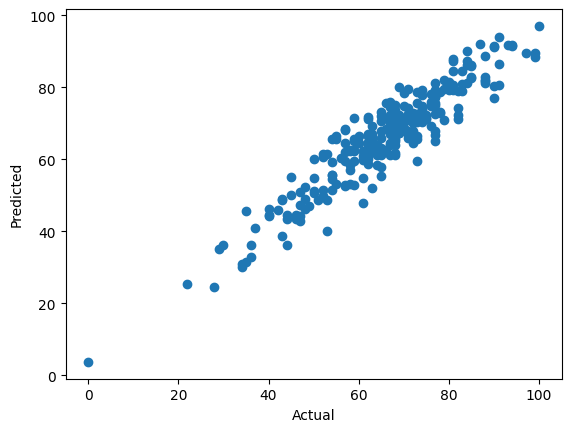

In [29]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math score'>

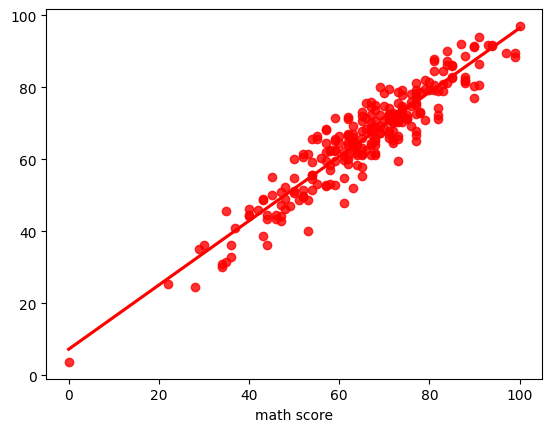

In [30]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

**Difference between Actual and Predicted Value**

In [31]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
112,54,55.615953,-1.615953
498,66,62.537296,3.462704
516,74,77.840844,-3.840844
774,66,68.410511,-2.410511
110,77,81.258752,-4.258752
...,...,...,...
750,71,71.481881,-0.481881
926,64,61.358643,2.641357
764,60,66.639703,-6.639703
847,64,58.371162,5.628838
